In [ ]:
# Install packages
%pip install networkx
%pip install numpy
%pip install tqdm
%pip install matplotlib

In [ ]:
# For sdp_algorithm

# %pip install cmake
# %pip install ecos==2.0.5
# %pip install cvxpy

In [ ]:
from starter import *
from greedy_algorithm import *
from k_cut_algorithm import *
import random

In [ ]:
import importlib
import starter
import greedy_algorithm
import k_cut_algorithm
importlib.reload(starter)
importlib.reload(greedy_algorithm)
importlib.reload(k_cut_algorithm)
from starter import *
from greedy_algorithm import *
from k_cut_algorithm import *

In [269]:
#import sdp_algorithm
#importlib.reload(sdp_algorithm)
#from sdp_algorithm import *

# Phase 1 - Create Inputs

In [270]:
# Add edges with G.add_edge(u, v, weight=w)
# Idea: consider making the inputs with a solution in mind, 
# such that you know the solution when the outputs are released

def small(G: nx.Graph):
    # Each even node connects to each odd node, with 'random' weight
    # Optimal Solution: Partition into odd and even teams
    for i in range(100):
        for j in range(i + 1, (100 - i) // 2):
            G.add_edge(i, i + 2 * j, weight=min(int(math.sin(i + j) * 500 + 850), int(math.cos(2 * j + i) * 500 + 850), 1000))
    
def medium(G: nx.Graph):
    # Each node connects to its first 20 multiples, with the closer multiples having larger weights
    # Optimal Solution: Partition such that co-primeness between groups are maximized
    for i in range(300):
        for j in range(20):
            if i != (i * j) % 300:
                G.add_edge(i, (i * j) % 300, weight=40 * (20 - j + 1))
    
def large(G: nx.Graph):
    # Completely random graph, where each node has between 5 and 15 edges, to any other node with random weight
    # Optimal Solution: Unknown
    for i in range(1000):
        for _ in range(random.randint(5, 15)):
            j = random.randint(1, 999)
            if i != j:
                G.add_edge(i, j, weight=random.randint(1, 1000))

# Phase 2 - Implement your Solver

In [271]:
def random_solve(G: nx.Graph):
    """Randomly partitions G into a random number of teams."""
    k = random.randint(5, 10)
    max_per_team = len(G.nodes) / k
    teams = [0 for _ in range(k)]
    for v in G.nodes:
        look_for_team = True
        while look_for_team:
            this_team = random.randint(1, k)
            if teams[this_team - 1] < max_per_team:
                G.nodes[v]['team'] = this_team
                teams[this_team - 1] += 1
                look_for_team = False

In [272]:
def current_solve(in_file):
    def current_solve_helper(G: nx.Graph):
        file_name = in_file[in_file.index("/") + 1:]
        file_name = file_name[:file_name.index("in")]
        instance = read_input(in_file)
        current_solution = read_output(instance, "outputs" + "/" + file_name + "out")
        for v in G.nodes:
            G.nodes[v]['team'] = current_solution.nodes[v]['team']
    return current_solve_helper

In [273]:
def solve(G: nx.Graph):
    
    # TODO: Simulated Annealing
        # TODO: Try updating specific nodes, and seeing which changes to make based on homework 11 algorithm
        # TODO: Decrease the amount of nodes updated as time goes on
        # TODO: Do these steps for k-1, k, and k+1, pick the best

    k = optimize_k(G)
    G = max_k_cut_solve(k)(G)

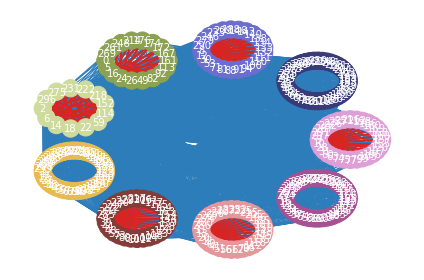

greedy_algorithm 183040.82013173166


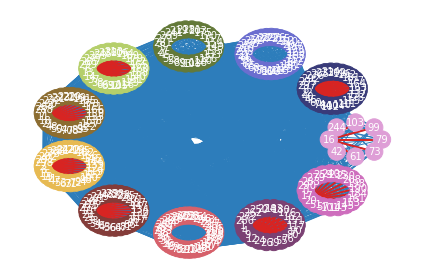

current_solve_helper 237150.78598822607


In [274]:
# TODO: Write a function that fetches a random input to test on

import greedy_algorithm
importlib.reload(greedy_algorithm)
from greedy_algorithm import *


input = 'inputs/medium148.in'

solvers = [greedy_algorithm, current_solve(input)]

for solver in solvers:
    G = read_input(input)

    k = solver(G)
    validate_output(G)
    visualize(G)
    print(solver.__name__, score(G))

In [275]:
for _ in range(1000):
    run(greedy_algorithm, 'inputs/small72.in', 'outputs/small72.out')

inputs/small72.in: cost 50763.53919607959
inputs/small72.in: cost 303527.8281828459
inputs/small72.in: cost 320460.2749121555
inputs/small72.in: cost 303803.5192813973
inputs/small72.in: cost 301359.5192813973
inputs/small72.in: cost 668797.87212707
inputs/small72.in: cost 49317.201219078954
inputs/small72.in: cost 51433.22862783637
inputs/small72.in: cost 78917.19775707302
inputs/small72.in: cost 63192.0883757614
inputs/small72.in: cost 54230.16198762229
inputs/small72.in: cost 288061.31714926916
inputs/small72.in: cost 668797.87212707
inputs/small72.in: cost 668797.87212707
inputs/small72.in: cost 53817.63534547891
inputs/small72.in: cost 668797.87212707
inputs/small72.in: cost 296341.07019425917
inputs/small72.in: cost 47103.30396973771
inputs/small72.in: cost 668797.87212707
inputs/small72.in: cost 668797.87212707
inputs/small72.in: cost 668797.87212707


KeyboardInterrupt: 

In [277]:
# TODO: Write a function that can separate which inputs to run, given a class (small, medium, large) and range of numbers

for _ in range(10):
    run_all(greedy_algorithm, 'inputs', 'outputs')

  0%|          | 0/780 [00:00<?, ?it/s]

inputs/large225.in: cost 500480.87212707003
inputs/small232.in: cost 500406.87212707003
inputs/large116.in: cost 59470.453340671054
inputs/large59.in: cost 40367.94004332819
inputs/small150.in: cost 634736.7054843365
inputs/large147.in: cost 584447.0151049109
inputs/small101.in: cost 2497638.87212707
inputs/small197.in: cost 187571.7085310581
inputs/small206.in: cost 52885.70364765726


KeyboardInterrupt: 

In [276]:
tar('outputs', True)